<a href="https://colab.research.google.com/github/ntnfit98/bigdata/blob/master/Nguy%E1%BB%85n_Thanh_Nguy%C3%AAn_Bai8_16035381.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple EDA and classification notebook.

### Import the necessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
plt.style.use('ggplot')

#### Load the data into a dataframe

In [ ]:
df = pd.read_csv("/content/sample_data/HR_comma_sep.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Basic EDA

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


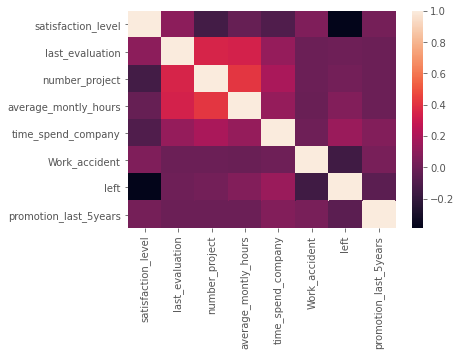

In [ ]:
sns.heatmap(corr)

Text(0.5, 0, 'Department')

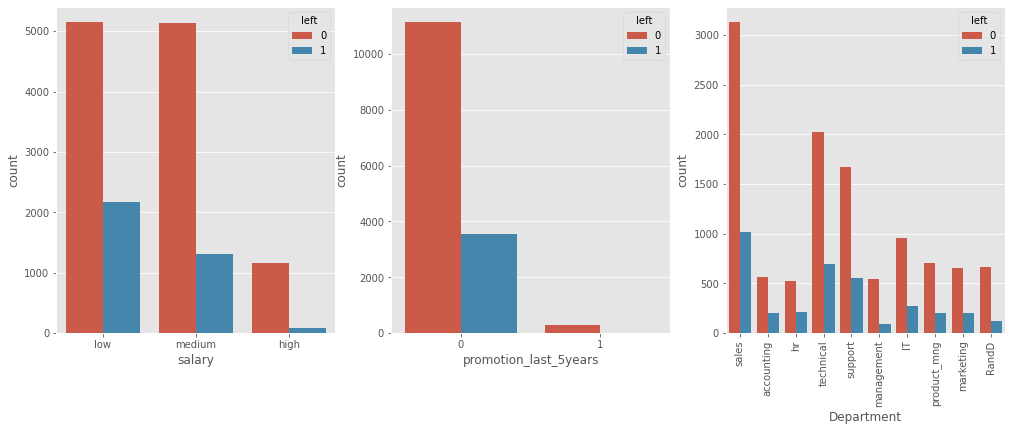

In [ ]:
f, axes = plt.subplots(ncols=3,figsize=(17,6))

sns.countplot(x='salary',hue='left',ax=axes[0],data=df)
sns.countplot(x='promotion_last_5years',hue='left',ax=axes[1],data=df)
sns.countplot(x='sales',hue='left',ax=axes[2],data=df)
plt.xticks(rotation=90)
plt.xlabel('Department')

* A larger number of employees with lower salary left compared to others.
* Sales department saw the highest number of employees leave the company, followed by technical and support departments.

Text(0.5, 1.0, 'Number of Years at the Company')

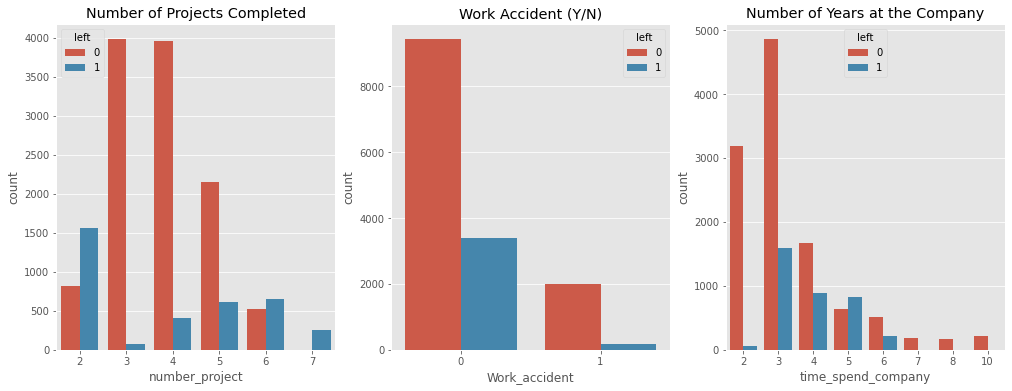

In [ ]:
f, axes = plt.subplots(ncols=3,figsize=(17,6))

a0 = sns.countplot(x='number_project',hue='left',ax=axes[0],data=df)
a0.set_title('Number of Projects Completed')
a1 = sns.countplot(x='Work_accident',hue='left',ax=axes[1],data=df)
a1.set_title('Work Accident (Y/N)')
a2 = sns.countplot(x='time_spend_company',hue='left',ax=axes[2],data=df)
a2.set_title('Number of Years at the Company')

* People with 2 projects left the company at an alarming rate. There is an upward trend in leaving the company right the year 3.
* A large portion of the employees left the company after  spending 3 years there. There was a downward trend with reasonable numbers up to the sixth year.

Text(0.5, 1.0, 'Satisfaction Level in Each Department')

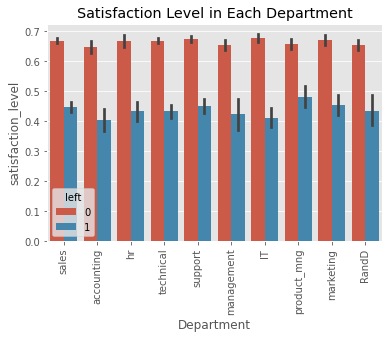

In [ ]:
sns.barplot(x='sales',y='satisfaction_level',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Satisfaction Level in Each Department')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


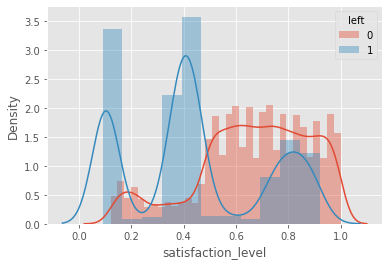

In [ ]:
left_yes = df[df['left'] == 1]
left_no = df[df['left'] == 0]
sns.distplot(left_no.satisfaction_level,label='0')
sns.distplot(left_yes.satisfaction_level,label='1')
plt.legend(title='left',loc='best')

* Employees with lower job satisfaction left the organization across all the departments.
* A few employees with higher job satisfaction also left.

Text(0.5, 1.0, 'Average hours clocked by employees in each department')

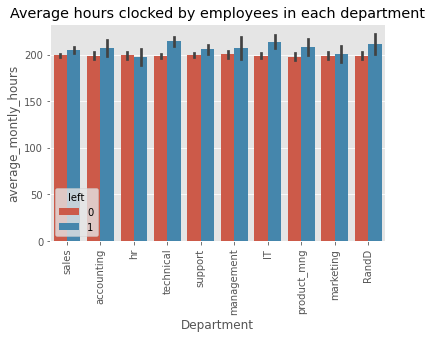

In [ ]:
sns.barplot(x='sales',y='average_montly_hours',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Average hours clocked by employees in each department')

* People clocking higher hours left the organization across all the departments.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


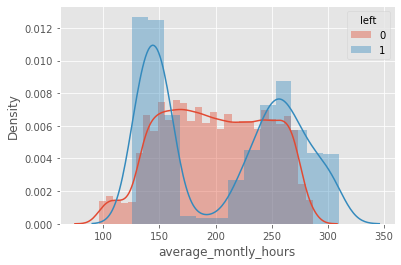

In [ ]:
sns.distplot(left_no.average_montly_hours,label='0')
sns.distplot(left_yes.average_montly_hours,label='1')
plt.legend(title='left',loc='best')

* However, there is more to it. People clocking around 150 hours and people clocking around 250 hours left in higher number than other people. The distribution has two peaks in these regions.

Text(0.5, 1.0, 'Last evaluation')

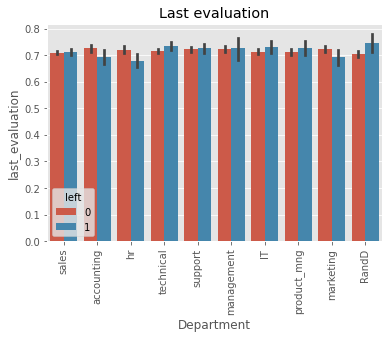

In [ ]:
sns.barplot(x='sales',y='last_evaluation',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Last evaluation')

* In *RandD*, people with higher score left the company.
* This was the case (although marginally) with other departments expect *accounting, hr* and *marketing*.

### Classification

#### Data preprocessing

In [ ]:
lst = ['sales','technical','support','IT','product_mng','marketing','RandD','accounting','hr','management']

for i, pos in enumerate(lst):
    df.sales.replace(to_replace=pos,value=i,inplace=True)

In [ ]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
lst = ['low','medium','high']

for i, sal in enumerate(lst):
    df.salary.replace(to_replace=sal,value=i,inplace=True)

In [ ]:
df.info()

In [ ]:
x = df.drop('left',axis=1)
y = df.left
y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

* Split the data into train, dev and test set.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_dev,x_test,y_dev,y_test = train_test_split(x_test,y_test,test_size=0.5)

* Scale the data.

In [ ]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)
x_test = scaler.transform(x_test)

#### Decision Tree

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=3,)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8030
           1       1.00      0.99      1.00      2469

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

Training accuracy: 0.999


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1724
           1       0.95      0.94      0.94       526

    accuracy                           0.97      2250
   macro avg       0.97      0.96      0.96      2250
weighted avg       0.97      0.97      0.97      2250

Dev set accuracy: 0.974
AUC: 0.963


#### Ramdom Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8030
           1       1.00      1.00      1.00      2469

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

Training accuracy: 1.000


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1724
           1       1.00      0.96      0.98       526

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.99      2250
weighted avg       0.99      0.99      0.99      2250

Dev set accuracy: 0.991
AUC: 0.981


In [ ]:
clf = SVC(C=500)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8030
           1       0.98      0.97      0.98      2469

    accuracy                           0.99     10499
   macro avg       0.99      0.98      0.99     10499
weighted avg       0.99      0.99      0.99     10499

Training accuracy: 0.990


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1724
           1       0.95      0.92      0.93       526

    accuracy                           0.97      2250
   macro avg       0.96      0.95      0.96      2250
weighted avg       0.97      0.97      0.97      2250

Dev set accuracy: 0.969
AUC: 0.952


* Random Forest classifier showed better performance on the dev set and the same is chosen.

#### Classifying the data found in the test set.

In [ ]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(x_test)
print('Test set Report\n {}'.format(classification_report(y_test,pred)))
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test,pred)))

Test set Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1674
           1       1.00      0.95      0.97       576

    accuracy                           0.99      2250
   macro avg       0.99      0.97      0.98      2250
weighted avg       0.99      0.99      0.99      2250

Test set accuracy: 0.986
AUC: 0.973
